# V13코드를 기반으로 lightGBM 을 사용한 버전

# 시각화

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

def bar_chart(feature):
    yes = train[train['voted']==1][feature].value_counts()
    no = train[train['voted']==2][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [83]:
import pandas as pd

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test_x.csv')

# 데이터 전처리

In [84]:
import numpy as np
train['trust']=1
test['trust']=1

family_drop_score=10

train['trust']=np.where(train['familysize'] >= family_drop_score, 0, train['trust'])
test['trust']=np.where(test['familysize'] >= family_drop_score, 0, test['trust'])

train['familysize']=np.where(train['familysize'] >= family_drop_score, family_drop_score, train['familysize'])
test['familysize']=np.where(test['familysize'] >= family_drop_score, family_drop_score, test['familysize'])

train['trust']=np.where(train['education'] == 0, 0, train['trust'])
train['education']=np.where(train['education'] == 0, 2, train['education'])
test['trust']=np.where(test['education'] == 0, 0, test['trust'])
test['education']=np.where(test['education'] == 0, 2, test['education'])

train['urban']=train['urban'].astype('str')
test['urban']=test['urban'].astype('str')

train['education']=train['education'].astype('str')
test['education']=test['education'].astype('str')


In [85]:
time = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE','QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

train[time] = np.where(train[time] > 10000, 10000, train[time])
test[time] = np.where(test[time] > 10000, 10000, test[time])

# train[time] = np.where(train[time] > 10000, train[time].median(), train[time])
# test[time] = np.where(test[time] > 10000, test[time].median(), test[time])

P_time=['QbE', 'QcE', 'QhE', 'QjE', 'QmE', 'QoE', 'QpE', 'QsE', 'QtE']
N_time=['QaE', 'QdE', 'QeE', 'QfE', 'QgE', 'QiE', 'QkE', 'QlE', 'QnE', 'QqE', 'QrE']

train['p_time']=train[P_time].sum(axis=1)
test['p_time']=test[P_time].sum(axis=1)
train['n_time']=train[N_time].sum(axis=1)
test['n_time']=test[N_time].sum(axis=1)

# 원핫 인코딩 (gender, race, religion)

In [86]:
train=pd.get_dummies(train, columns=['race'])
train=pd.get_dummies(train, columns=['religion'])
train=pd.get_dummies(train, columns=['urban'])
train=pd.get_dummies(train, columns=['hand'])
train=pd.get_dummies(train, columns=['gender'])

test=pd.get_dummies(test, columns=['race'])
test=pd.get_dummies(test, columns=['religion'])
test=pd.get_dummies(test, columns=['urban'])
test=pd.get_dummies(test, columns=['hand'])
test=pd.get_dummies(test, columns=['gender'])

In [87]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['age_group_code'] = label.fit_transform(train['age_group'])
train['education_code'] = label.fit_transform(train['education'])

test['age_group_code'] = label.fit_transform(test['age_group'])
test['education_code'] = label.fit_transform(test['education'])

# Feature : Mach_score (마키아벨리니즘 스코어)

In [88]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [89]:
reverse = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

In [90]:
reverse = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for r in reverse: 
        train[r] = 6 - train[r]
        test[r] = 6 - test[r]

In [91]:
train['Mach_score'] = train[Answers].mean(axis = 1)
test['Mach_score'] = test[Answers].mean(axis = 1)

# Feature : tp0106, tp0207, tp0308, tp0409, tp0510 (관련있는 tp 끼리 묶음)

In [92]:
Tp = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
             'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

In [93]:
reverse = ["tp06", "tp07", "tp08", "tp09", "tp10"]
for r in reverse: 
        train[r] = 7 - train[r]
        test[r] = 7 - test[r]
        
tp0106=['tp01', 'tp06']
tp0207=['tp02', 'tp07']
tp0308=['tp03', 'tp08']
tp0409=['tp04', 'tp09']
tp0510=['tp05', 'tp10']
train['tp0106'] = train[tp0106].sum(axis = 1)
train['tp0207'] = train[tp0207].sum(axis = 1)
train['tp0308'] = train[tp0308].sum(axis = 1)
train['tp0409'] = train[tp0409].sum(axis = 1)
train['tp0510'] = train[tp0510].sum(axis = 1)
temp=['tp0106', 'tp0207', 'tp0308','tp0409', 'tp0510']

test['tp0106'] = test[tp0106].sum(axis = 1)
test['tp0207'] = test[tp0207].sum(axis = 1)
test['tp0308'] = test[tp0308].sum(axis = 1)
test['tp0409'] = test[tp0409].sum(axis = 1)
test['tp0510'] = test[tp0510].sum(axis = 1)

In [94]:
train[temp].describe()

,tp0106,tp0207,tp0308,tp0409,tp0510
count,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,7.545023,7.590090,5.261486,7.763749,4.017921
std,3.509913,2.916658,3.043976,3.366161,2.473560
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,3.000000,5.000000,2.000000
50%,8.000000,8.000000,5.000000,8.000000,4.000000
75%,11.000000,10.000000,7.000000,11.000000,6.000000
max,14.000000,14.000000,14.000000,14.000000,14.000000


In [95]:
tp_drop_score=12

train['trust']=np.where(train['tp0106'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0207'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0308'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0409'] >= tp_drop_score, 0, train['trust'])
train['trust']=np.where(train['tp0510'] >= tp_drop_score, 0, train['trust'])

test['trust']=np.where(test['tp0106'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0207'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0308'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0409'] >= tp_drop_score, 0, test['trust'])
test['trust']=np.where(test['tp0510'] >= tp_drop_score, 0, test['trust'])

train['tp0106']=np.where(train['tp0106'] >= tp_drop_score, tp_drop_score, train['tp0106'])
train['tp0207']=np.where(train['tp0207'] >= tp_drop_score, tp_drop_score, train['tp0207'])
train['tp0308']=np.where(train['tp0308'] >= tp_drop_score, tp_drop_score, train['tp0308'])
train['tp0409']=np.where(train['tp0409'] >= tp_drop_score, tp_drop_score, train['tp0409'])
train['tp0510']=np.where(train['tp0510'] >= tp_drop_score, tp_drop_score, train['tp0510'])

test['tp0106']=np.where(test['tp0106'] >= tp_drop_score, tp_drop_score, test['tp0106'])
test['tp0207']=np.where(test['tp0207'] >= tp_drop_score, tp_drop_score, test['tp0207'])
test['tp0308']=np.where(test['tp0308'] >= tp_drop_score, tp_drop_score, test['tp0308'])
test['tp0409']=np.where(test['tp0409'] >= tp_drop_score, tp_drop_score, test['tp0409'])
test['tp0510']=np.where(test['tp0510'] >= tp_drop_score, tp_drop_score, test['tp0510'])

# wr에서 가져갈 feature : 1, 3, 5, 6, 9, 11

# wf_(1~3) : 설문자의 어휘 능력 (허구인 단어의 정의를 앎)

In [96]:
wf=['wf_01', 'wf_02', 'wf_03']

train['wf']=train[wf].mean(axis=1)
train['trust']= np.where(train['wf'] >= 0.0, 0, train['trust'])

test['wf']=test[wf].mean(axis=1)
test['trust']= np.where(test['wf'] >= 0.0, 0, test['trust'])

# drop 할 feature들

In [97]:
drop_feature=[
#                 'engnat',
    
#                 'familysize',
    
#                 'married',
    
#                 'race_Arab', 'race_Asian','race_Black','race_Indigenous Australian','race_Native American','race_Other','race_White',               
    
#                 'religion_Agnostic','religion_Atheist', 'religion_Buddhist','religion_Christian_Catholic','religion_Christian_Mormon', 
#                 'religion_Christian_Other', 'religion_Christian_Protestant', 'religion_Hindu','religion_Jewish','religion_Muslim', 
#                 'religion_Other','religion_Sikh',
    
#                 'gender_Female','gender_Male',
                
#                 'urban_0','urban_1','urban_2','urban_3',
    
                'education',
    
#                 'trust',
                
                'age_group',
                
                'QaA', 'QbA', 'QcA', 'QdA', 'QeA','QfA', 'QgA', 'QhA', 'QiA', 'QjA', 'QkA', 'QlA', 'QmA', 'QnA', 'QoA','QpA', 
                'QqA', 'QrA', 'QsA', 'QtA',
                
                'QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE','QmE', 'QnE', 'QoE', 'QpE', 
                'QqE', 'QrE', 'QsE', 'QtE',
    
#                 'p_time' , 

#                 'n_time',
              
                'tp01', 'tp02', 'tp03', 'tp04', 'tp05','tp06','tp07', 'tp08', 'tp09', 'tp10',
              
#                 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09','wr_10','wr_11', 'wr_12', 'wr_13', 
                'wr_02',  'wr_04', 'wr_07', 'wr_08', 'wr_10', 'wr_12', 'wr_13', 
                'wf_01', 'wf_02', 'wf_03', 'wf',
              
                'hand_0','hand_1','hand_2','hand_3',
    
                'index'
              
              ]

train = train.drop(drop_feature, axis = 1)
test = test.drop(drop_feature, axis = 1)

# Model 생성

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb

# 사용한 feature 목록

In [99]:
for i in train:
    print(i)


engnat
familysize
married
voted
wr_01
wr_03
wr_05
wr_06
wr_09
wr_11
trust
p_time
n_time
race_Arab
race_Asian
race_Black
race_Indigenous Australian
race_Native American
race_Other
race_White
religion_Agnostic
religion_Atheist
religion_Buddhist
religion_Christian_Catholic
religion_Christian_Mormon
religion_Christian_Other
religion_Christian_Protestant
religion_Hindu
religion_Jewish
religion_Muslim
religion_Other
religion_Sikh
urban_0
urban_1
urban_2
urban_3
gender_Female
gender_Male
age_group_code
education_code
Mach_score
tp0106
tp0207
tp0308
tp0409
tp0510


# 모델 전처리

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from lightgbm import LGBMClassifier

import warnings
import gc
warnings.filterwarnings("ignore")

x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

def lgbm_method(x_data, y_data, randomnum, ratio=0.9, min_feats=20):
    #행 개수 구하기
    feats=x_data.columns.tolist()
    
    # 반환할 아카이브 설정 (model, 현재 행 번호, 전체 행, score)
    archive = pd.DataFrame(columns=['model', 'n_feats', 'feats', 'score'])
    while True:
        # 모델 생성
        model = LGBMClassifier(objective = 'binary', num_iterations=10**4, learning_rate=0.05)
        # train, test set으로 분류
        x_train, x_test, y_train, y_test = train_test_split(x_data[feats], y_data, random_state=randomnum)
        # 오류가 100번이상 수정되지 않으면 종료
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=100, verbose=False)
        # x_test로 예측을 하여 pred에 저장
        pred = model.predict_proba(x_test)
        pred = pred[:,1]
        # 점수 저장
        score = roc_auc_score(y_test, pred)
        # n_feats에 행의 개수 저장
        n_feats = len(feats)
        print(n_feats, score)
        archive = archive.append({'model': model, 'n_feats': n_feats, 'feats': feats, 'score': score}, ignore_index=True)
        feat_imp = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)
        next_n_feats = int(n_feats * ratio)
        if next_n_feats < min_feats:
            break
        else:
            feats = feat_imp.iloc[:next_n_feats].index.tolist()
    return archive

In [101]:
lgbm_A = lgbm_method(x_train, y_train, 42)

45 0.7700079994391427
40 0.7699107148527444


In [102]:
lgbm_B = lgbm_method(x_train, y_train, 100)

45 0.7684781063162497
40 0.7681060605588155


In [103]:
lgbm_C = lgbm_method(x_train, y_train, 568)

45 0.7652750562925242
40 0.7647942239910934


In [104]:
lgbm_D = lgbm_method(x_train, y_train, 1024)

45 0.7716693847488054
40 0.7720167920531804


# 모델 설정

In [105]:
model = LGBMClassifier(objective="binary", num_iterations= 10**4, learning_rate=0.05)

In [106]:
x_train_1 = x_train[lgbm_A.iloc[1,2]]
model.fit(x_train_1, y_train)
pred_y1 = model.predict_proba(test[lgbm_A.iloc[1,2]])
pred_y1 = pred_y1[:,1]

In [107]:
x_train_2 = x_train[lgbm_B.iloc[1,2]]
model.fit(x_train_2, y_train)
pred_y2 = model.predict_proba(test[lgbm_B.iloc[1,2]])
pred_y2 = pred_y2[:,1]

In [108]:
x_train_3 = x_train[lgbm_C.iloc[1,2]]
model.fit(x_train_1, y_train)
pred_y3 = model.predict_proba(test[lgbm_C.iloc[1,2]])
pred_y3 = pred_y3[:,1]

In [109]:
x_train_4 = x_train[lgbm_C.iloc[1,2]]
model.fit(x_train_4, y_train)
pred_y4 = model.predict_proba(test[lgbm_D.iloc[1,2]])
pred_y4 = pred_y4[:,1]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

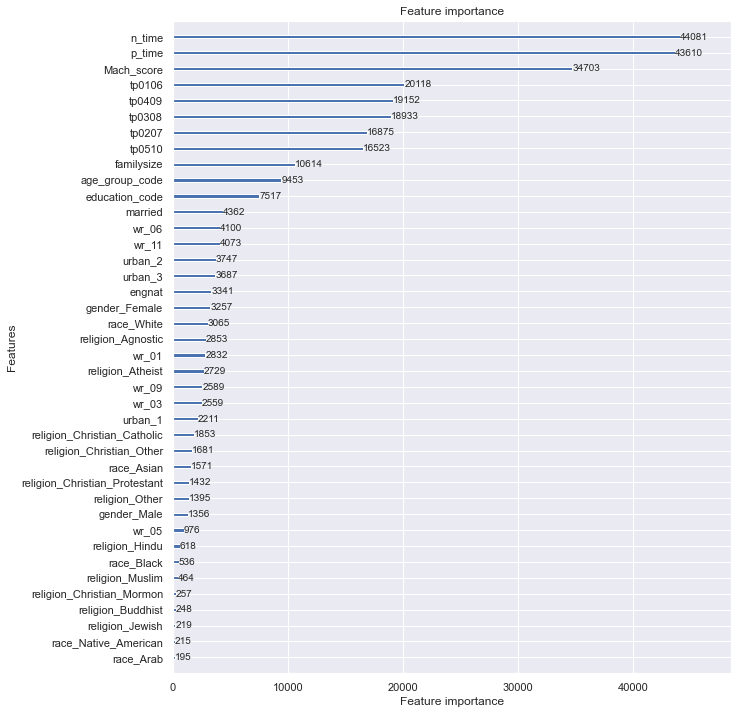

In [110]:
pred_all = (pred_y1 + pred_y2 + pred_y3 + pred_y4) * (1/4)

submission= pd.read_csv('./sample_submission.csv')
submission['voted'] = pred_all
submission.to_csv('submission_proba.csv', index = False)


from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=ax)